<a href="https://colab.research.google.com/github/shanaam/teamA-grebes-NMA2020/blob/master/200722_sm_amplitude_sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neuron amplitude sort

In [16]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sys
import pandas as pd          

## download data

In [17]:
import os, requests

fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

import numpy as np
dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()
print(dat.keys())        

dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])


## get some data

In [18]:
num_cells,num_times = dat['sresp'].shape
run = np.squeeze(dat['run'])
sresp = dat['sresp']

## visualize the data


### Ca2+ activity

[Text(0, 0.5, 'Ca2+ Activity'), Text(0.5, 0, 'Time')]

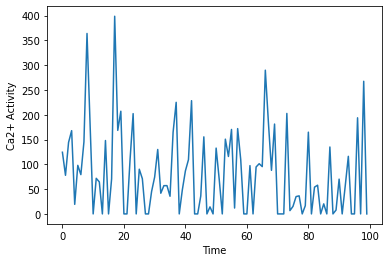

In [19]:
neuron_idx = 134
stop_len = 100
plt.plot(sresp[neuron_idx,:stop_len])
ax = plt.gca()
ax.set(
  xlabel="Time",
  ylabel="Ca2+ Activity",
)


### running speed

[Text(0, 0.5, 'Running Speed [a.u.]'), Text(0.5, 0, 'Time')]

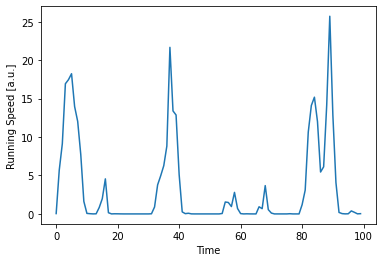

In [20]:
run_thres = 0.5 #cut-off threhold for running speed to be considered running [a.u.]

plt.plot(run[:stop_len])

t = np.arange(stop_len)

ax = plt.gca()
ax.set(
  xlabel="Time",
  ylabel="Running Speed [a.u.]",
)

## get calcium activity per neuron

[Text(0, 0.5, 'Ca2+ Activity'), Text(0.5, 0, 'Time')]

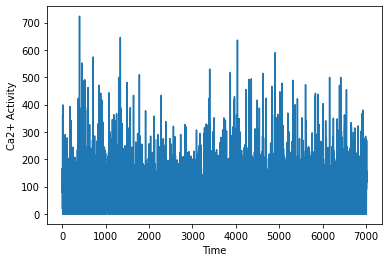

In [21]:
plt.plot(sresp[neuron_idx,:])
ax = plt.gca()
ax.set(
  xlabel="Time",
  ylabel="Ca2+ Activity",
)

In [24]:
# make an activity vector with total activity of the cell over the 7000+ time bins
ca_act_vector = np.zeros(num_cells)

for i in range(cells):
  ca_act_vector[i] = np.sum(sresp[i, :])

print(ca_act_vector)



[ 48325.5234375   37910.75        32756.8359375  ... 229296.8125
 368397.          19839.44140625]


## visualize the total Ca activity

No handles with labels found to put in legend.


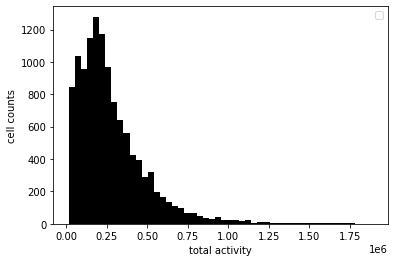

In [26]:
plt.figure()
plt.hist(ca_act_vector,50, color='k')
# plt.axvline(0.05, color = 'r', label='0.05')
plt.xlabel('total activity')
plt.ylabel('cell counts')
plt.legend()
plt.show()

## seperate training data

In [ ]:
# training_len = 5000

# X = sresp[neuron_idx,:training_len]
# y = [x[0] for x in dat['run']][:training_len]

# Ryan's code (unused)



---
---
---
---
---
---
---













## get shuffled pvalue

Each cell’s response vector was shuffled by a random interval from ~20 s before or after its true position


In [ ]:
# def shuffle_speed_mod(speed_score,speed,fr,shuffn=250):
#   a = -20;
#   b = 20; 
#   r = np.random.randint(a,b,shuffn)

#   speed_score_shuff = []
#   for i in range(len(r)):
#     sc = compute_speed_mod(speed,np.roll(fr,r[i]))
#     speed_score_shuff.append(sc)
 
#   # DOI: 10.2202/1544-6115.1585
#   shuff_pvalue = (sum(np.abs(speed_score_shuff) > np.abs(speed_score)) + 1) /(len(speed_score_shuff) + 1);

#   return shuff_pvalue

## get slope and intercept using linear regression

In [ ]:
# def get_slope_intercept(speed,fr):

#   x = speed[np.newaxis].T
#   y = fr[np.newaxis].T

#   model = LinearRegression()
#   model.fit(x,y)

#   m = model.coef_
#   b = model.intercept_
#   return m,b

## get speed maps 

speed maps are the mean neural response at each speed bin 

In [ ]:
# def get_speed_map(speed,fr):
#   speed_vec = np.arange(min(run),np.percentile(run,95),2)

#   fr_speed_maps = []
#   # get mean firing rate in each speed bin
#   for j in range(len(speed_vec)-1):
#     start = speed_vec[j]
#     stop = speed_vec[j+1]

#     idx = [speed > start] and [speed < stop]
#     fr_speed_maps.append(np.mean(fr[tuple(idx)]))

#     # sem.append(np.std(fr(idx)) / np.sqrt(len(fr(idx))))
#   return fr_speed_maps

## run though every cell

In [ ]:
# speed_score = []
# shuff_pvalue = []
# m = []
# b = []
# speed_map = []

# for i in range(cells):
#   # get speed response correlation
#   speed_score.append(compute_speed_mod(run,X[i,:]))
  
#   # shuffle correlation
#   shuff_pvalue.append(shuffle_speed_mod(speed_score[-1],run,X[i,:]))
  
#   # linear regression
#   m_,b_ = get_slope_intercept(run,X[i,:])
#   m.append(m_)
#   b.append(b_)

#   # speed map
#   speed_map.append((get_speed_map(run,X[i,:])))

#   # update counter
#   sys.stdout.write('\rcurrent cell: %d' %(cells - i))
#   sys.stdout.flush()

# d={'speed_score': speed_score, 'shuff_pvalue': shuff_pvalue,
#           'slope': m, 'intercept': b}
# df = pd.DataFrame(d)

# df

current cell: 1

## Figures

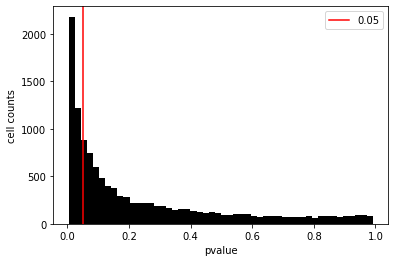

3736  of  11983  cells are modulated by running speed


In [ ]:
# plt.figure()
# plt.hist(shuff_pvalue,50,color='k')
# plt.axvline(0.05,color = 'r',label='0.05')
# plt.xlabel('pvalue')
# plt.ylabel('cell counts')
# plt.legend()
# plt.show()

# print(sum(df.shuff_pvalue < 0.05),' of ',cells,' cells are modulated by running speed')